In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from pathlib import Path

In [3]:
data_dir = Path('./data')
data_new_dir = Path('./data_new')
plot_dir = Path('./plots')
plot_new_dir = Path('./plots_new')

In [16]:
def remove_outliers(data,peak_indices,threshold=0.05):
    '''
    Inputs:
        data -> signal
        peak_indices -> indices at which data has a peak
        threshold -> minimum distance between peak and closest points
    
    Outputs:
        peak_indices_filtered -> peak_indices with outliers removed
    
    Removes the peaks in which the vertical distance between the peak and its closest neighbors is higher than threshold.
    '''
    condition = lambda i: np.abs(data[i]-data[i-1])>threshold or np.abs(data[i]-data[i+1])>threshold
    peak_indices_filtered=[x for x in peak_indices if not condition(x)]
    return peak_indices_filtered

def peak_detector(V_d,plot=False):
    '''
    Inputs:
        V_d -> drifting voltage
        plot -> if true saves a plot in the plot folder
    
    Outputs:
        peaks -> values of the local maxima
    
    Evaluates the local maxima of the signal and plots them.
    '''
    if V_d > 0.12:
        V_d_str = str(np.round(V_d,2))
        if len(V_d_str) < 4: V_d_str=V_d_str+'0'
        filename_dat = "V"+V_d_str[0]+"_"+V_d_str[2]+V_d_str[3]+".dat"
        filename_png = "V"+V_d_str[0]+"_"+V_d_str[2]+V_d_str[3]+".png"
        data = np.loadtxt(data_dir/filename_dat)
        peak_indices,_=find_peaks(data[:,1],prominence=0.2)
        peak_indices_filtered=remove_outliers(data[:,1],peak_indices,threshold=0)
        peaks=data[peak_indices_filtered,1]*10
        if plot:
            plt.figure(figsize=(15,8))
            plt.plot(data[:,0],data[:,1],'.')
            plt.plot(data[peak_indices_filtered,0],peaks,'.',c='red')
            plt.xlabel("Time [s]")
            plt.ylabel("Voltage [V]")
            plt.savefig(plot_dir/filename_png, format="png", bbox_inches="tight")
            plt.close()
    else:
        V_d_str = str(np.round(V_d,3))
        if len(V_d_str) < 4: V_d_str=V_d_str+'00'
        if len(V_d_str) < 5: V_d_str=V_d_str+'0'
        filename_dat = "V"+V_d_str[0]+"_"+V_d_str[2]+V_d_str[3]+V_d_str[4]+".dat"
        filename_png = "V"+V_d_str[0]+"_"+V_d_str[2]+V_d_str[3]+V_d_str[4]+".png"
        data = np.loadtxt(data_new_dir/filename_dat)
        peak_indices,_=find_peaks(data[:,1],prominence=0.2)
        peak_indices_filtered=remove_outliers(data[:,1],peak_indices,threshold=0)
        peaks=data[peak_indices_filtered,1]
        if plot:
            plt.figure(figsize=(15,8))
            plt.plot(data[:,0],data[:,1],'.')
            plt.plot(data[peak_indices_filtered,0],peaks,'.',c='red')
            plt.xlabel("Time [s]")
            plt.ylabel("Voltage [V]")
            plt.savefig(plot_new_dir/filename_png, format="png", bbox_inches="tight")
            plt.close()
    return peaks

In [17]:
V_d_max=0.7
V_d_arr = np.concatenate((np.arange(0,0.12+0.005,0.005),np.arange(0.13,V_d_max+0.01,0.01)))
peaks = [peak_detector(V_d,plot=True) for V_d in V_d_arr]

In [18]:
output=[]
for x, y in zip(V_d_arr,peaks):
    for temp in y:
        output.append([x,temp])
np.savetxt("bifurcation.dat",output)

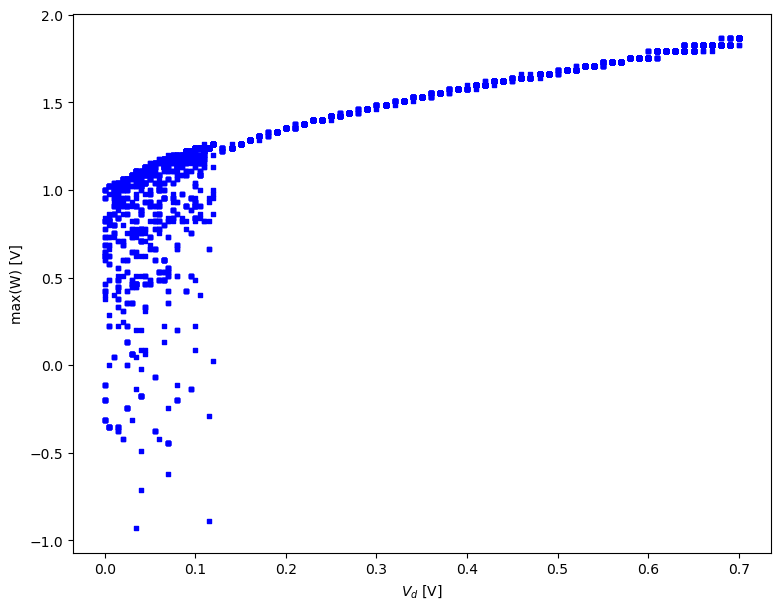

In [19]:
plt.figure(figsize=(9,7))
plt.xlabel("$V_d$ [V]")
plt.ylabel("max(W) [V]")
for x, y in zip(V_d_arr,peaks):
    plt.scatter([x]*len(y),y,s=5,c='blue',marker=',')
#plt.axvline(0.18,ls='dashed',alpha=0.5)
#plt.text(0.185,1,"Saturation")
plt.show()